In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
os.chdir('ml_datasets')

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    'ramen_sushi/train/',
    target_size=(100,100),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

Found 1500 images belonging to 2 classes.


In [5]:
test_generator = test_datagen.flow_from_directory(
    'ramen_sushi/test/',
    target_size=(100,100),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

Found 500 images belonging to 2 classes.


```
Build and Train a Sequential Model
Define Data Augmentation Parameters:

Set rotation range to 40 degrees for random rotations.
Set width shift range to 20% of the total width for horizontal shifts.
Set height shift range to 20% of the total height for vertical shifts.
Set shear range to 0.2 for shearing transformations.
Set zoom range to 0.2 for zooming inside pictures.
Enable random horizontal flipping.
Set fill mode to 'nearest' for filling new pixels.
Define the Sequential Model:

Layer 1: Add a Conv2D layer with 10 filters, a 3x3 kernel size, stride 1, valid padding, ReLU activation, and input shape (100, 100, 3).
Layer 2: Add a MaxPooling2D layer with a 2x2 pool size.
Layer 3: Add a Dropout layer with a 20% dropout rate.
Layer 4: Add another Conv2D layer with 10 filters, a 3x3 kernel size, and ReLU activation.
Layer 5: Add another MaxPooling2D layer with a 2x2 pool size.
Layer 6: Add another Dropout layer with a 20% dropout rate.
Layer 7: Add a Flatten layer.
Layer 8: Add a Dense layer with 32 units and ReLU activation.
Layer 9: Add another Dropout layer with a 20% dropout rate.
Output Layer: Add a Dense layer with 1 unit and sigmoid activation.
Compile the Model:

Use RMSprop as the optimizer with a learning rate of 0.001.
Set the loss function to 'binary_crossentropy'.
Track 'accuracy' as a metric.
Train the Model:

Use train_generator for training data.
Set the number of epochs to 10.
Use test_generator for validation data.
Optionally, include callbacks.
Display the Model's architecture

DisplayModelSummary: model.summary()
```

In [6]:
from tensorflow.keras.optimizers import RMSprop

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.9):
            print("\nAccuray is at 90%, stopping training.")
            self.model.stop_training = True


callbacks = MyCallback()

In [7]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           activation='relu',
                           input_shape=(100, 100, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),  

    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [10]:
model.compile(optimizer=RMSprop(learning_rate=0.001), 
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator, callbacks=[callbacks])  


model.summary()

Epoch 1/10


2024-06-03 09:29:08.064572: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.3577 - accuracy: 0.8440

2024-06-03 09:29:10.803195: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 4s 71ms/step - loss: 0.3577 - accuracy: 0.8440 - val_loss: 0.5076 - val_accuracy: 0.7800
Epoch 2/10
47/47 [==============================] - 3s 70ms/step - loss: 0.3089 - accuracy: 0.8700 - val_loss: 0.6337 - val_accuracy: 0.6880
Epoch 3/10
47/47 [==============================] - 3s 69ms/step - loss: 0.2809 - accuracy: 0.8793 - val_loss: 0.6103 - val_accuracy: 0.7360
Epoch 4/10
47/47 [==============================] - 3s 70ms/step - loss: 0.2741 - accuracy: 0.8820 - val_loss: 0.6056 - val_accuracy: 0.7460
Epoch 5/10
46/47 [============================>.] - ETA: 0s - loss: 0.2448 - accuracy: 0.9033
Accuray is at 90%, stopping training.
47/47 [==============================] - 3s 71ms/step - loss: 0.2437 - accuracy: 0.9033 - val_loss: 0.5912 - val_accuracy: 0.7500
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (Non

In [9]:
history = model.fit(
    train_generator,
    epochs=10)  


Epoch 1/10


2024-06-03 09:27:57.821797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-06-03 09:27:57.825137: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


47/47 [==============================] - 3s 50ms/step - loss: 0.6594 - accuracy: 0.5973
Epoch 2/10
47/47 [==============================] - 2s 51ms/step - loss: 0.5925 - accuracy: 0.6967
Epoch 3/10
47/47 [==============================] - 2s 51ms/step - loss: 0.5228 - accuracy: 0.7413
Epoch 4/10
47/47 [==============================] - 2s 53ms/step - loss: 0.5049 - accuracy: 0.7693
Epoch 5/10
47/47 [==============================] - 2s 51ms/step - loss: 0.4573 - accuracy: 0.7867
Epoch 6/10
47/47 [==============================] - 2s 51ms/step - loss: 0.4516 - accuracy: 0.7993
Epoch 7/10
47/47 [==============================] - 2s 51ms/step - loss: 0.4328 - accuracy: 0.8013
Epoch 8/10
47/47 [==============================] - 2s 51ms/step - loss: 0.3924 - accuracy: 0.8233
Epoch 9/10
47/47 [==============================] - 2s 51ms/step - loss: 0.3669 - accuracy: 0.8387
Epoch 10/10
47/47 [==============================] - 2s 51ms/step - loss: 0.3581 - accuracy: 0.8293


<Axes: >

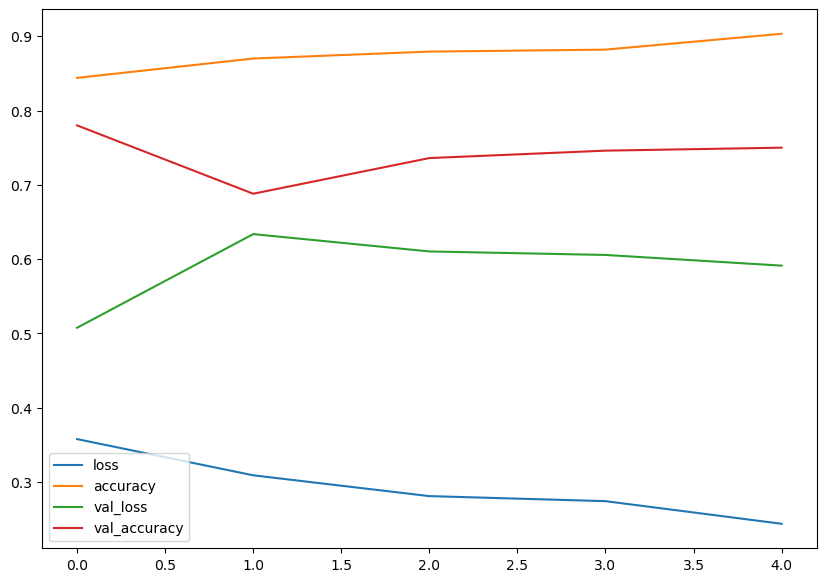

In [12]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,7))